# Bank Customer Churn Prediction

## Importing the necessary llibraries

In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
# getting the dataset and displaying the data
df = pd.read_csv("DATASET_for_ANN.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Exploratory Data Analysis

In [3]:
# First of all we check wether there are null values or not
df.isnull().sum() #There are not null values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### We will describe the data to see weather we want to apply standard scaling or not

In [4]:
df.describe()
#There is a need to apply standard scaling on Balance , Estimated Salary 

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Applying one hot encoder on Geography and label encoder on Gender 

In [5]:
geography = pd.get_dummies(df.Geography, prefix='Country')
df = pd.concat([df,geography],axis=1)

label_encoder = LabelEncoder()
gender_encoding = label_encoder.fit_transform(df['Gender'])
df['Gender'] = gender_encoding

In [6]:
# We will remove the old Geography as one hot encoder has been replaced for that
# We will also remove RowNumber, CustomerID and Surname from the data as this has nothing to do with the target
df.drop(['Geography','Surname','RowNumber','CustomerId'],axis=1, inplace=True)

#### Splitting the data into Feature X and target y

In [7]:
y = df['Exited']
X = df.drop(['Exited'],axis=1)

#### Calculating feature importance by Univariate Method

In [8]:
selector = SelectKBest(f_classif, k = 'all')

X_new = selector.fit_transform(X, y)
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
featuresSelected = names
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

         Feat_names    F_Scores
2               Age  886.063275
10  Country_Germany  310.258384
7    IsActiveMember  249.800794
4           Balance  142.473832
1            Gender  114.727989
9    Country_France  111.360517
11    Country_Spain   27.809468
5     NumOfProducts   22.915223
0       CreditScore    7.344522
3            Tenure    1.960164
8   EstimatedSalary    1.463262
6         HasCrCard    0.509401


<AxesSubplot:xlabel='F_Scores', ylabel='Feat_names'>

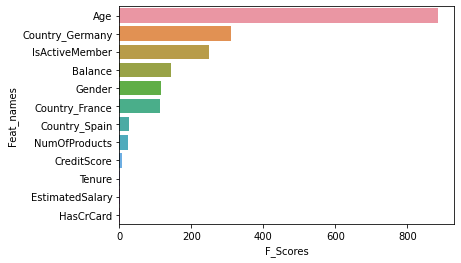

In [9]:
# HasCrCard has the least contribution to the data. But we are still going to use it.
sns.barplot(x='F_Scores',y='Feat_names',data=ns_df_sorted )

#### Checking Imbalance Data

/home/hassan/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

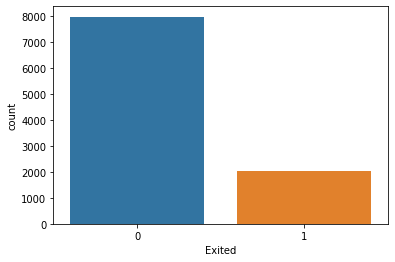

In [10]:
#As the data is not balanced so we have to Upsample the data
sns.countplot(y)

/home/hassan/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

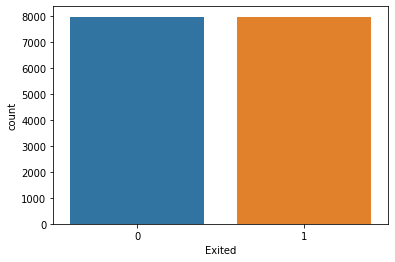

In [11]:
smote = SMOTE()
X, y = smote.fit_resample(X,y)
#After that the data is balanced perfectly
sns.countplot(y)

## Splitting the Data & Standard Scaling 

In [12]:
#Here we are splitting the data into training and testing data. Testing data is 20 percent where as training data is 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Training

In [13]:
from tensorflow import keras
model = keras.Sequential([
    #input shape is defined by number of feature
    #32 is the number of hidden layer 
    keras.layers.Dense(32, input_shape=(12,), activation='relu'),
    keras.layers.Dense(11, activation='relu'),
    #Last layer activation is sigmoid as there is only 0 or 1 output
    keras.layers.Dense(1, activation='sigmoid')
])

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

2021-11-30 01:49:27.713289: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-30 01:49:27.713310: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-11-30 01:49:28.583119: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-30 01:49:28.583145: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-30 01:49:28.583158: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ibnalsaad): /proc/driver/nvidia/version does not exist
2021-11-30 01:49:28.583348: I tensorflow/core/platform/cpu_feature_

In [14]:
#Model Summary will tell us the architecture of our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 11)                363       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 791
Trainable params: 791
Non-trainable params: 0
_________________________________________________________________


In [15]:
traces = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
399/399 [==============================] - 1s 724us/step - loss: 0.4520 - accuracy: 0.7911
Epoch 2/100
399/399 [==============================] - 0s 741us/step - loss: 0.3594 - accuracy: 0.8408
Epoch 3/100
399/399 [==============================] - 0s 742us/step - loss: 0.3361 - accuracy: 0.8505
Epoch 4/100
399/399 [==============================] - 0s 717us/step - loss: 0.3260 - accuracy: 0.8549
Epoch 5/100
399/399 [==============================] - 0s 739us/step - loss: 0.3204 - accuracy: 0.8569
Epoch 6/100
399/399 [==============================] - 0s 704us/step - loss: 0.3174 - accuracy: 0.8589
Epoch 7/100
399/399 [==============================] - 0s 724us/step - loss: 0.3149 - accuracy: 0.8584
Epoch 8/100
399/399 [==============================] - 0s 714us/step - loss: 0.3127 - accuracy: 0.8602
Epoch 9/100
399/399 [==============================] - 0s 722us/step - loss: 0.3113 - accuracy: 0.8621
Epoch 10/100
399/399 [==============================] - 0s 711us/step - l

399/399 [==============================] - 0s 705us/step - loss: 0.2726 - accuracy: 0.8807
Epoch 80/100
399/399 [==============================] - 0s 631us/step - loss: 0.2729 - accuracy: 0.8798
Epoch 81/100
399/399 [==============================] - 0s 645us/step - loss: 0.2720 - accuracy: 0.8796
Epoch 82/100
399/399 [==============================] - 0s 830us/step - loss: 0.2722 - accuracy: 0.8809
Epoch 83/100
399/399 [==============================] - 0s 725us/step - loss: 0.2718 - accuracy: 0.8806
Epoch 84/100
399/399 [==============================] - 0s 848us/step - loss: 0.2711 - accuracy: 0.8804
Epoch 85/100
399/399 [==============================] - 0s 742us/step - loss: 0.2729 - accuracy: 0.8794
Epoch 86/100
399/399 [==============================] - 0s 749us/step - loss: 0.2719 - accuracy: 0.8795
Epoch 87/100
399/399 [==============================] - 0s 757us/step - loss: 0.2718 - accuracy: 0.8809
Epoch 88/100
399/399 [==============================] - 0s 745us/step - loss:

# Testing Data & Confusion Matrix

In [16]:
y_predicted = model.predict(X_test)
y_predicted = (y_predicted > 0.5)
y_predicted = [e[0] for e in y_predicted]
predicted_y = []
for e in y_predicted:
    if e:
        predicted_y.append(1)
    else:
        predicted_y.append(0)

In [17]:
c_matrix = confusion_matrix(y_test, y_predicted)
print(c_matrix)
accuracy_score(y_test, y_predicted)

[[1356  178]
 [ 240 1412]]


0.8688010043942247

#### Training Accuracy is 88% and Testing accuracy is 87%. So we can assume that model trained well and not overfitted